# BIOINFO EXAM #1

Aaron Bautista, Raymond Gerardo, Harvey Lallave, Patrick Latorre

---
## Question #1
Use the BLAST website to revise the topics we have covered.

### Max Target Sequences
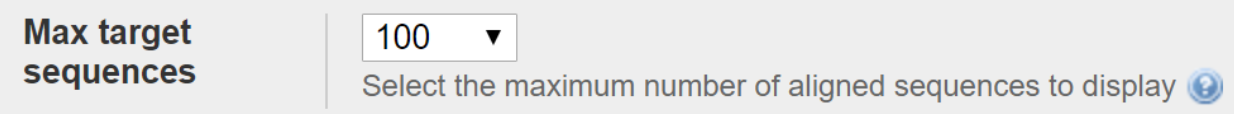

<p>
    As discussed in class, sequence alignment can yield many highest-scored aligned sequences. The Max Target Sequences parameter limits the number of highest-scored alignments. This also means it does not necessarily affect the alignments outputted by the algorithm.
</p>

### Word Size
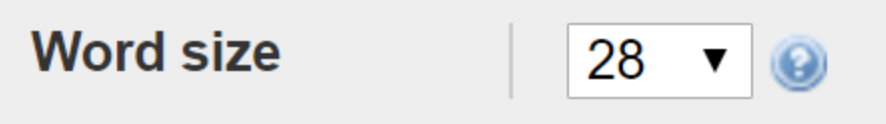

<p>
    A word is also synonymous with substring; exactly matching words are called seeds. These seeds are used to extend the corresponding alignment. In this case, the Word Size parameter dictates the minimum length of matching words before they could be used for extension. Making the word size bigger produces less alignments but more specific hits. On the other hand, a smaller word size produces more alignments but with less specific hits.
</p>

### Match / Mismatch Scores
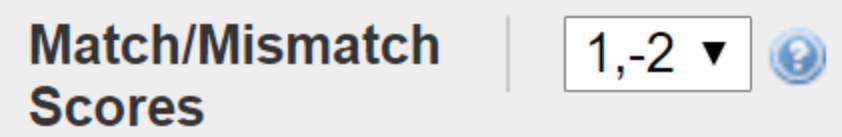

<p>
    The match/mismatch score is the number of points attributed to the total alignment score whenever a base matches or mismatches. This is generally the parameter often tweaked to yield the most favorable alignment/s.
</p>

### Gap Costs
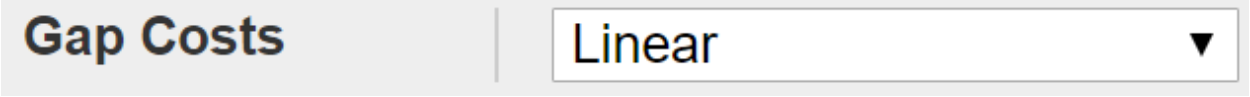

<p>
    The Gap cost parameter determines the penalty given when opening and extending a gap. A linear gap cost penalizes the score based on the gap distance alone. While an affine gap cost penalizes based on both the distance and the number of gaps existing. This parameter is also often tweaked to get the most favorable alignments.
</p>

---
## Question #2
It is known that cg-dinucleotides are rare in the human genome, one reason being DNA-
methylation. Let’s try to check for ourselves by counting the frequency of all dinucleotides.

1. From Chr22, take a random chunk of 50 kilo-bases. Let’s call this string S.

In [19]:
import gzip
from Bio import SeqIO

input_file = 'chr22.fa.gz'

with gzip.open(input_file, "rt") as handle:
    for wholeRecord in SeqIO.parse(handle, "fasta"):
#         print(wholeRecord, "\n")
        print()

totalLength = len(wholeRecord.seq)
# TODO: Display size, chr 22 and fragrment
print("File name: ", input_file,
      "\nLength of chromosome 22 (n-characters): ", totalLength)
#       "\n\t50 Kilo-bases random string / 50000 Characters\n") 

from random import randint

S = "N"

# Extracting random segment
while(S.count("N") != 0):
    start = randint(0, totalLength - 50000)
    end = start+50000
    S = wholeRecord.seq[start:end]

# print("(" + str(len(S)), "Characters)", S)



File name:  chr22.fa.gz 
Length of chromosome 22 (n-characters):  50818468


2. Normalize all to lower-case. Make sure S has a very few / almost no N

In [2]:
S = S.lower()

# Make sure S has a very few / almost no N: See step 1
# print(S)

3.  Recall that DNA is double-stranded. So you need to take into account the dinucleotides on the reverse strand also. Let S RC be the reverse-complement of S. Concatenate S and S RC , and let’s call this new string S’.

In [3]:
SRC = S.reverse_complement()
SPrime = S + SRC
# print(SPrime)

4. There are 16 kinds of dinucleotides. For each, report the number of its occurrence in S’. Report also the frequency, which is the count divide by the total number of dinucleotides. Describe what you see.

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

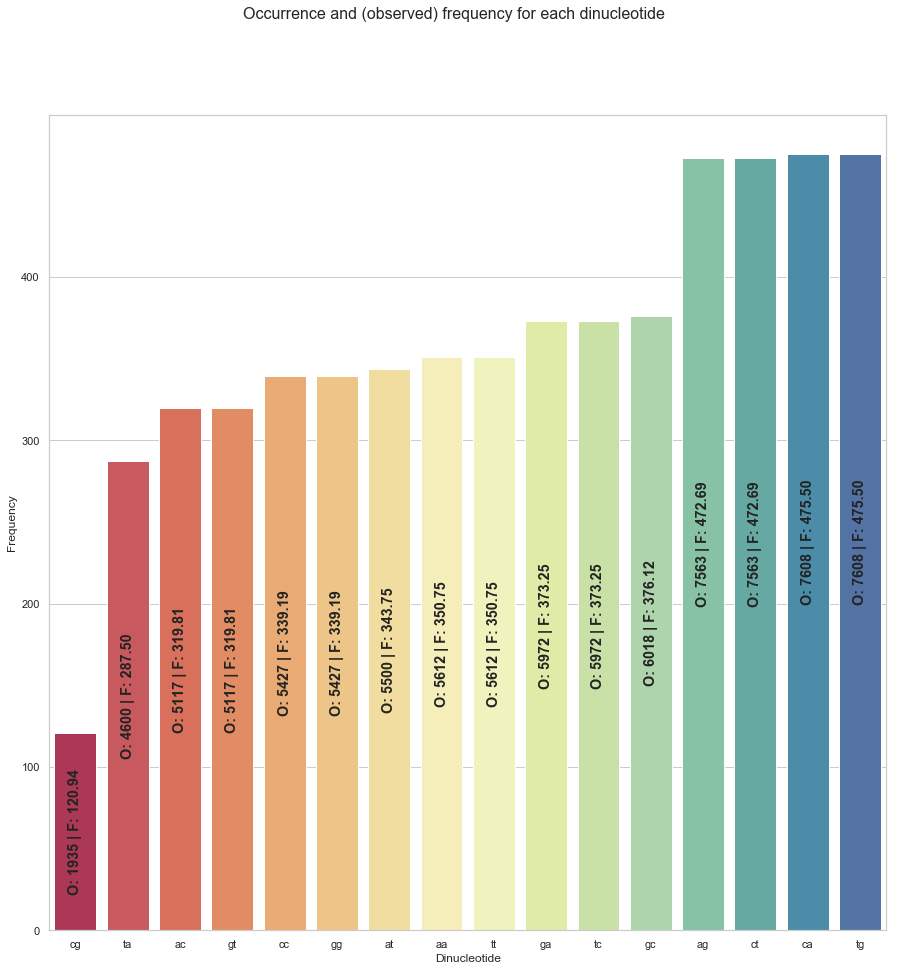

• There exist multiple dinucleotides
 that contains the same or slightly different count with
 its reverse complement.
• The lowest value of occurences belongs to  ['cg'] 
	- Frequency: 120.94  | Occurence:  1935 
• The highest number of occurrences belongs to  ['ca', 'tg'] 
	- Frequency: 475.50  | Occurence:  7608


In [5]:
## Occurrences
occurrences = {"aa": 0, "ac": 0, "ag": 0, "at": 0,
               "ca": 0, "cc": 0, "cg": 0, "ct": 0, 
               "ga": 0, "gc": 0, "gg": 0, "gt": 0,
               "ta": 0, "tc": 0, "tg": 0, "tt": 0}

def buildDataFrame(SPrime):
    for pair in occurrences:
        occurrences[pair] = SPrime.count(pair)
#     print("Occurrences: %s" % occurrences)

    ## Frequencies
    frequencies = occurrences.copy()
    for pair in frequencies:
        frequencies[pair] = frequencies[pair] / 16

    df = pd.DataFrame.from_dict(frequencies, orient='index', columns=['Frequency'])
    df.index.name = 'Dinucleotide'

    # sort df by Frequency column
    df = df.sort_values(['Frequency'])
    return df, frequencies

df, frequencies = buildDataFrame(SPrime)
sns.set(style="whitegrid")
source_data = pd.Series(frequencies)

plt.figure(figsize=(15,15))
ax = sns.barplot(x = df.index, y = 'Frequency', data = df, palette='Spectral')

for idx, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text( p.get_x() + p.get_width()/2.,                             # x
            (p.get_y() + height/2.) if height > 90                     # y
                else (height + height/2 + 10),                 
            "O: %s | F: %.2f" %  (occurrences[df.index[idx]], height), # value
            fontsize = 'larger',
            fontweight = 'bold',
            color = '#232323',
            va = 'center',                                 # Vertical Alignment
            ha = 'center',                                 # Horizontal Alignment
            rotation = 90)
    
        
plt.suptitle('Occurrence and (observed) frequency for each dinucleotide', fontsize=16)
plt.show()
# print(df)
print('\u2022 There exist multiple dinucleotides\n that contains the same '
      'or slightly different count with\n its reverse complement.\n'
      '\u2022 The lowest value of occurences belongs to ', df.index[df['Frequency'] == df['Frequency'].min()].tolist(), 
          '\n\t- Frequency: %.2f'% df['Frequency'].min(),
          ' | Occurence: ', occurrences[df['Frequency'].idxmin()],
      '\n\u2022 The highest number of occurrences belongs to ', df.index[df['Frequency'] == df['Frequency'].max()].tolist(), 
          '\n\t- Frequency: %.2f'% df['Frequency'].max(),
          ' | Occurence: ', occurrences[df['Frequency'].idxmax()],
      )

5. Evaluating Statistical Significance

In [6]:
# Combining the pair of dinucleotides that are the reverse-complements of each other.

freq = -1
pairIndex = 'x'
for i, row in df.iterrows():
#     print(i," ", row.Frequency, " | ", freq, " ", pairIndex)
    if freq == row.Frequency:
        df.at[pairIndex, 'Frequency'] = freq + row.Frequency
        df.rename({pairIndex: '%s and %s' % (pairIndex, i)}, axis = 'index', inplace=True)
        freq = -1
        pairIndex = 'x'
        df.drop(i, inplace=True)
    else:
        freq = row.Frequency
        pairIndex = i
    

# Computing the ratio R for each group (R = ObservedFreq / ExpectedFreq)
# For example "ag" and "ct": 
#    observed frequency = (count of “ag” + count of “ct” ) / (total count of all dinucleotides);
#    expected frequency = ((count of “a” + count of “t”) / length of S’) x ((count of “g” + count of “c”) / length of S’).


# TODO: Validation, not sure if count of A for the string S' dapat or S, ang ginawa ko is sa S'
countA = SPrime.count("a")
countC = SPrime.count("c")
countG = SPrime.count("g")
countT = SPrime.count("t")

# print("%d %d %d %d" % (countA, countC, countG, countT))
for i, row in df.iterrows():
    #TODO: Validation, not sure if 16 ba dapat (cause initially 16 dinucleotides) or dapat bang 10 nalang (dahil pinag combine yung iba)
    observedFreq = row.Frequency / 16 

    i2 = i.replace(' and ', '')
    expectedFreq = (((countA if i2[0] == 'a' else countC if i2[0] == 'c' else countG if i2[0] == 'g' else countT) + 
                     (countA if i2[1] == 'a' else countC if i2[1] == 'c' else countG if i2[1] == 'g' else countT)) / len(SPrime) 
                    * (1 if len(i) == 2 else 
                   (((countA if i2[2] == 'a' else countC if i2[2] == 'c' else countG if i2[2] == 'g' else countT) + 
                     (countA if i2[3] == 'a' else countC if i2[3] == 'c' else countG if i2[3] == 'g' else countT)) / len(SPrime))))
    R = observedFreq / expectedFreq
    df.at[i, 'R-Ratio'] = R
    
# df.style.applymap('font-weight: bold', subset= pd.IndexSlice[df.index[df.index=='cg'], :], inplace = True)
df.style

,Frequency,R-Ratio
Dinucleotide,,
cg,120.938,15.7202
ta,287.5,34.6099
ac and gt,639.625,159.906
cc and gg,678.375,183.394
at,343.75,41.3814
aa and tt,701.5,162.657
ga and tc,746.5,186.625
gc,376.125,48.8911
ag and ct,945.375,236.344


6. Iterative Testing

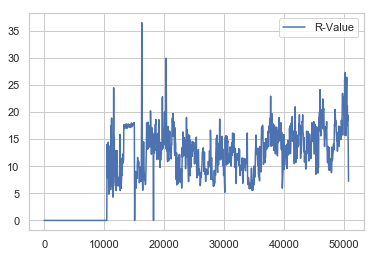

In [7]:
# For position indices i = 0 , 50kb, 100kb, 150kb, and so on:
i    = 0
done = False
data = pd.DataFrame(None, None, ['R-Value'])

# Extracting 50*i starting position segment
while not done:
    start = 50000 * i
    end   = 50000 * (i + 1) + 1 
    if end > len(wholeRecord.seq):
        end  = len(wholeRecord.seq)
        done = True
        
    S = wholeRecord.seq[start:end]


#   Getting S'  
    S = S.lower()
    SRC = S.reverse_complement()
    SPrime = S + SRC
    
#   Extracting "cg" R-values
    df, frequencies = buildDataFrame(SPrime)

    countC = SPrime.count("c")
    countG = SPrime.count("g")
    cgInfo = df.loc['cg', 'Frequency']
    
    observedFreq = cgInfo / 16 
    expectedFreq = (countC + countG) / len(SPrime) 
    R            = observedFreq / expectedFreq if expectedFreq != 0 else float('NaN')

    data.loc[50 * i] = R
    
#   Iterating loop
    i += 1
    
data.fillna(0.0, inplace =True)
# print(data)
# sns.kdeplot(data['R-Value'], shade = True)

data.plot(y = 'R-Value', use_index = True)


---
## Question 3

Let us compare a human HOX protein to the fruit-fly HOX homolog.

1.  Go to the GenBank website. Search for the protein sequences with IDs: AAD01939 and AAQ67266. Download the two protein sequences.

>AAD01939.2 homeobox protein HOXA7 [Homo sapiens]
MSSSYYVNALFSKYTAGTSLFQNAEPTSCSFAPNSQRSGYGAGAGAFASTVPGLYNVNSPLYQSPFASGY
GLGADAYGNLPCASYDQNIPGLCSDLAKGACDKTDEGALHGAAEANFRIYPWMRSSGPDRKRGRQTYTRY
QTLELEKEFHFNRYLTRRRRIEIAHALCLTERQVKIWFQNRRMKWKKEHKDEGPTAAAAPEGAVPSAAAT
AAADKADEEDDDEEEEDEEE

>AAQ67266.1 antennapedia [Drosophila virilis]
MTMSTNNCESMTSYFTNSYMGADMHHGHYPGNGVTDLDAQQMHHYSQNPNQQGNMPYPRFPPYDRMPYYN
GQGMDQQQQQHQGYSRPDSPSSQVGGVMPQAQTNGQLVSVAQQQQQTQQQQQAQTQQQQAQQAPLQQQQH
PQVTQQVTHPQQQQPVVYASCKLQAAVGGLGMVQEGGSPPLVDQMGGHHMNAQMTLPHHMGHPQAQLGYT
DVGVPDVTEVHQNHHNMGMYGQQQTGVPPVVAPPQAMMHPGAGQGPPQMHQGHPGQHTPPSQNPSSQSSG
MPSPLYPWMRSQFGKCQERKRGRQTYTRYQTLELEKEFHFNRYLTRRRRIEIAHALCLTERQIKIWFQNR
RMKWKKENKTKGEPGSGGEGDEITPPNSPQ

In [8]:
from Bio import SeqIO

for seq in SeqIO.parse("AAD01939.fasta", "fasta"):
    hox_human = seq.seq
    
for seq in SeqIO.parse("AAQ67266.fasta", "fasta"):
    hox_fly = seq.seq

2. Choose an appropriate scoring scheme for alignment. You can get some advice from the BLAST website. This time, go to the protein (blastp) page. Uncollapse the Algorithm Parameters menu, and look at the options available under Scoring Parameters. They have a set of BLOSUM matrices and that you can choose from a pull-down menu. Which one will you choose? Why? Also for each choice of a BLOSUM matrix, they provide corresponding affine gap penalty parameters.

3. Find an optimal global alignment of the two sequences. How does it look like?

In [9]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.SubsMat import MatrixInfo as matlist

matrix = matlist.blosum62
gap_open = -11
gap_extend = -1

globalalignments = pairwise2.align.globalds(hox_human, hox_fly, matrix, gap_open, gap_extend)

print(format_alignment(*globalalignments[0]))

MS---------SSYYVNALFS---------------------------------------------KYTAGTSLFQNAEPTSCSFAPNSQRSGYGAGAGAFASTVPGLYNV---------------------NSPLYQSPF------------------------ASGYGLGADAYGNLP-----------------------------------------------CASYDQNIPGLCSDLAKGACDKTDEGALHGAAEAN----------------------FRIYPWMRS---SGPDRKRGRQTYTRYQTLELEKEFHFNRYLTRRRRIEIAHALCLTERQVKIWFQNRRMKWKKEHKDEGPTAAAAPEGAVPSAAATAAADKADEEDDDEEEEDEEE
|.         .||..|....                                             .|..|....|..........|.|..|..| |....|.|...|..|                     ..||.|...                        |...|||....|..|                                               ...|.|...|.....|.... ....||..|.....                      ...||||||   ....||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||.|..|......                   |.|.........
MTMSTNNCESMTSYFTNSYMGADMHHGHYPGNGVTDLDAQQMHHYSQNPNQQGNMPYPRFPPYDRMPYYNGQGMDQQQQQHQGYSRPDSPSSQVG-GVMPQAQTNGQLVSVAQQQQQTQQQQQAQTQQQQAQQAPLQQQQHPQVTQQVTHPQQQQPVVYASCKLQAAVGGLGMVQEGGSPPLVDQMGGHHMNAQMT

4. What is the score of the alignment? Is it statistically significant? In class, we derived analytic expression for E-values/p-values for gapless local alignments. They don’t apply to the global alignment case. Therefore, one way to check statistical significance is to compute an empirical distribution of the scores between random sequences. For two random sequences of the same length and the same background frequency of characters as the two Hox protein sequences, compute the global alignment score under the same scoring scheme you used in Step3. Repeat this maybe around 1000 times and draw the distribution of scores you obtain. Again, is the score you obtained in Step3 statistically significant?

5. Repeat Steps 3 and 4, but this time perform local alignment instead of global alignment. What are your findings.

In [10]:
matrix = matlist.blosum62
gap_open = -11
gap_extend = -1

localalignments = pairwise2.align.localds(hox_human, hox_fly, matrix, gap_open, gap_extend)

print(format_alignment(*localalignments[0]))

----------------------------------------------------------------------------------------------------------------------------------------------------------------------MSSSYYVNALFSKYTAGTSLFQNAEPTSCSFAPNSQRSGYGAGAGAFASTVPGLYNVNSPLYQSPFASGYGLGADAYGNLPCASYDQNIPGLCSDLAKGACDKTDEGALHGAAEANFRIYPWMRS---SGPDRKRGRQTYTRYQTLELEKEFHFNRYLTRRRRIEIAHALCLTERQVKIWFQNRRMKWKKEHKDEGPTAAAAPEGAVPSAAATAAADKADEEDDDEEEEDEEE
                                                                                                                                                                                                                                                                                            .||||||   ....||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||.|..|
MTMSTNNCESMTSYFTNSYMGADMHHGHYPGNGVTDLDAQQMHHYSQNPNQQGNMPYPRFPPYDRMPYYNGQGMDQQQQQHQGYSRPDSPSSQVGGVMPQAQTNGQLVSVAQQQQQTQQQQQAQTQQQQAQQAPLQQQQHPQVTQQVTHPQQQQPVVYASCKLQAAVGGLGMVQEGGSPPLVDQMGGHHMNAQMTLPHHMGHPQAQLGYTDVGVPDVTEVHQNHHNMGMYGQQQTGV